In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from imblearn import over_sampling
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("training_set.csv")
test = pd.read_csv("test_set.csv")

In [3]:
train.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.56,0.0,0.0,0.00,0.000,0.083,0.000,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.0,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.0,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.239,0.239,0.000,3.338,123,207,1
5,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,1.08,0.0,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.263,4,24,0
6,6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,0.29,0.14,0.58,0.00,0.00,0.00,0.00,0.00,0.14,2.35,0.14,1.02,0.0,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.29,0.0,0.00,0.00,0.0,0.00,0.0,0.14,0.0,0.0,0.00,0.000,0.204,0.000,0.153,0.153,0.102,2.705,73,368,1
7,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.000,0.000,2.284,19,329,0
8,8,0.00,0.00,0.19,0.00,0.19,0.19,0.00,0.00,0.00,0.19,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,1.54,0.00,0.96,0.0,0.00,0.00,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.0,0.19,0.57,0.38,0.38,0.00,0.0,0.19,0.38,0.0,0.38,0.0,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.000,0.000,2.894,45,411,0
9,9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,0.00,0.00,2.00,1.33,0.00,0.66,0.00,0.00,6.66,3.33,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.111,0.000,0.000,2.133,7,32,1


In [4]:
train.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
train.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.56,0.0,0.0,0.00,0.000,0.083,0.000,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.0,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.0,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.239,0.239,0.000,3.338,123,207,1
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,1.08,0.0,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.263,4,24,0
6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,0.29,0.14,0.58,0.00,0.00,0.00,0.00,0.00,0.14,2.35,0.14,1.02,0.0,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.29,0.0,0.00,0.00,0.0,0.00,0.0,0.14,0.0,0.0,0.00,0.000,0.204,0.000,0.153,0.153,0.102,2.705,73,368,1
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.000,0.000,2.284,19,329,0
8,0.00,0.00,0.19,0.00,0.19,0.19,0.00,0.00,0.00,0.19,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,1.54,0.00,0.96,0.0,0.00,0.00,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.0,0.19,0.57,0.38,0.38,0.00,0.0,0.19,0.38,0.0,0.38,0.0,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.000,0.000,2.894,45,411,0
9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,0.00,0.00,2.00,1.33,0.00,0.66,0.00,0.00,6.66,3.33,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.111,0.000,0.000,2.133,7,32,1


In [6]:
train.shape

(3910, 58)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [8]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

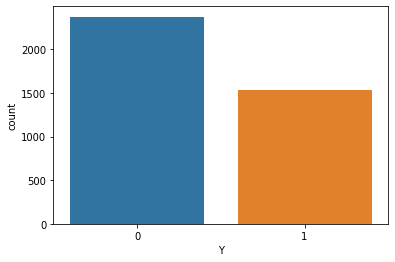

In [9]:
#Checking the frequency of X and Y
sns.countplot(x='Y', data=train)
plt.show()

This is imbalanced dataset

In [10]:
#Checking the correlation between the features
train_corr = train.corr()

In [11]:
train_corr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X1,1.000000,-0.026677,0.078010,0.007472,0.025377,0.060360,0.004934,0.002262,0.128300,0.038547,0.171678,0.104751,0.067566,0.048698,0.030180,0.035730,0.086834,-0.002730,0.123357,0.034077,0.173419,-0.022427,0.144290,0.113852,-0.073848,-0.062427,-0.068580,-0.047434,-0.040447,-0.054390,-0.038735,-0.030364,-0.040157,-0.024920,-0.045009,-0.054879,-0.055663,-0.006402,-0.021670,-0.034657,-0.006645,-0.025311,-0.019150,-0.023870,-0.043268,-0.030964,0.000079,-0.023943,-0.026043,-0.019084,-0.042516,0.049536,0.128384,-0.009324,0.032279,0.056025,0.101600,0.129805
X2,-0.026677,1.000000,-0.030758,-0.006455,-0.020289,-0.023827,0.006748,-0.014461,0.000199,0.035494,-0.005176,-0.037223,-0.015872,-0.007229,0.006929,-0.013212,-0.018350,0.027254,-0.056302,-0.016495,-0.019047,-0.008004,-0.020593,-0.013011,-0.042110,-0.036758,-0.030305,-0.027699,-0.021321,-0.026687,-0.017383,0.000161,-0.024177,-0.001002,-0.023105,-0.026692,-0.026063,-0.009118,-0.018999,-0.013824,-0.014673,-0.025270,-0.010271,-0.019413,-0.018212,-0.022355,-0.010023,-0.015188,-0.006349,-0.045741,-0.021728,-0.014497,-0.008293,0.001034,0.004376,0.001448,-0.021016,-0.026476
X3,0.078010,-0.030758,1.000000,-0.018648,0.065148,0.093120,0.037979,0.018314,0.098008,0.029760,0.050709,0.077474,0.053994,0.002396,0.119021,0.078939,0.040211,0.118980,0.155523,0.039439,0.158694,-0.031949,0.129317,0.044510,-0.091290,-0.060608,-0.111437,-0.051092,-0.060668,-0.037453,-0.042319,-0.061700,-0.053610,-0.061492,-0.050708,-0.050742,-0.062490,-0.005235,-0.016085,-0.048704,-0.033541,-0.017513,-0.043002,-0.053662,-0.058194,-0.053617,0.032571,-0.028276,-0.031217,-0.019428,-0.039784,0.109943,0.084654,-0.007824,0.080559,0.091124,0.067387,0.204965
X4,0.007472,-0.006455,-0.018648,1.000000,0.001837,-0.008594,0.015680,0.004700,0.000138,-0.002183,-0.012637,-0.016562,-0.012382,0.005478,0.005507,-0.001601,-0.001014,0.019736,-0.006577,-0.005191,0.006874,0.002384,0.016996,0.025754,-0.014550,-0.013196,-0.010331,-0.009812,-0.007452,-0.010182,-0.007296,-0.006559,-0.007789,-0.006607,-0.005248,-0.004966,-0.005943,-0.002670,-0.003814,-0.007291,-0.005431,-0.007884,-0.008885,-0.005654,-0.012197,-0.008678,-0.003361,-0.001247,0.001048,-0.009132,-0.008458,-0.002776,0.008798,-0.001704,0.004715,0.020733,0.021542,0.055609
X5,0.025377,-0.020289,0.065148,0.001837,1.000000,0.065459,0.157810,0.030440,0.023903,0.038379,0.067479,0.067349,0.034112,0.012188,0.060414,0.097187,0.142814,0.066033,0.104045,0.041365,0.144674,-0.014311,0.069213,-0.002166,-0.093030,-0.072827,-0.088071,-0.059129,0.034686,-0.053432,-0.042080,-0.023519,-0.024901,-0.023728,-0.048438,-0.049347,-0.070131,0.126392,-0.042598,-0.020521,-0.047719,0.116784,-0.049354,0.023299,-0.040867,-0.077833,-0.029090,-0.033886,-0.030872,-0.050698,-0.026512,0.025764,0.042036,0.004088,0.048949,0.045998,0.004402,0.242400
X6,0.060360,-0.023827,0.093120,-0.008594,0.065459,1.000000,0.074811,0.095892,0.132624,0.015163,0.054066,0.009798,0.071873,0.021755,0.178077,0.031423,0.073464,0.081159,0.102476,0.082048,0.115945,0.016275,0.222083,0.068483,-0.088019,-0.091411,-0.071940,-0.068259,-0.050762,-0.051722,-0.048449,-0.037225,-0.032429,-0.037741,-0.056201,-0.055286,-0.058864,-0.019182,-0.051076,-0.028840,-0.029365,-0.057910,-0.033324,-0.028939,-0.057839,-0.033190,-0.015270,-0.033412,-0.015690,-0.004675,-0.031567,0.065323,0.104906,0.020024,-0.010804,0.083647,0.086964,0.253613
X7,0.004934,0.006748,0.037979,0.015680,0.157810,0.074811,1.000000,0.047656,0.057607,0.048401,0.165411,-0.003629,0.012812,-0.020309,0.046729,0.106114,0.189727,0.116712,0.112001,0.060003,0.119586,0.005248,0.073446,0.028551,-0.088266,-0.079993,-0.065110,-0.065598,-0.047461,-0.056640,-0.045971,-0.040382,-0.039146,-0.040804,-0.052071,-0.053858,-0.048252,-0.014810,-0.050699,-0.019994,-0.032128,-0.049850,-0.050228,-0.033448,-0.0

In [12]:
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]

In [13]:
to_drop

['X32', 'X34', 'X36', 'X40']

['X32', 'X34', 'X36', 'X40'] these columns have the correlation greather than 70% so this column can be dropped

In [14]:
train = train.drop(to_drop, axis=1)

In [15]:
train.shape

(3910, 54)

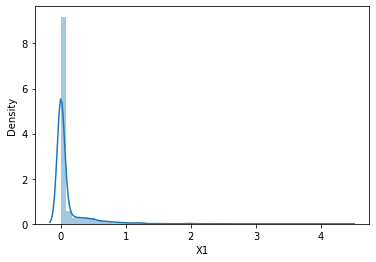

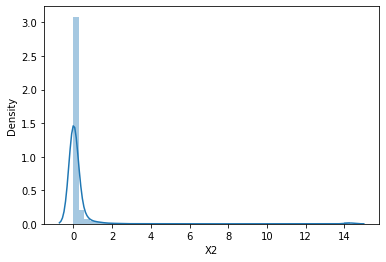

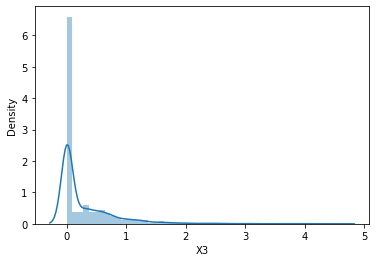

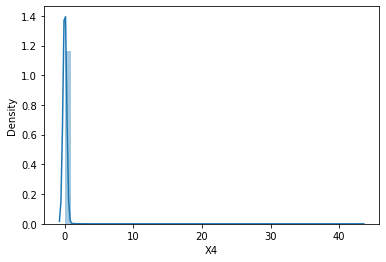

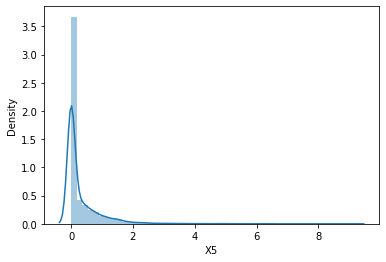

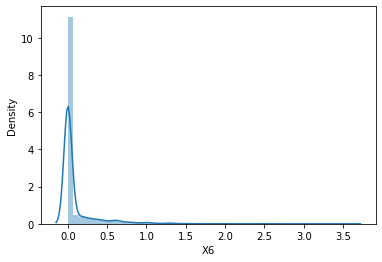

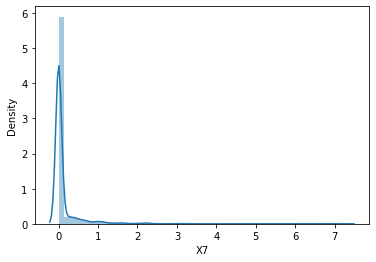

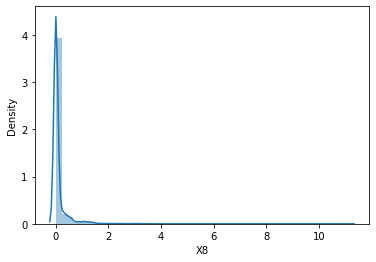

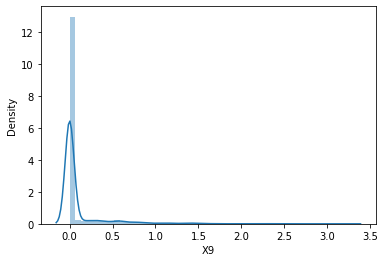

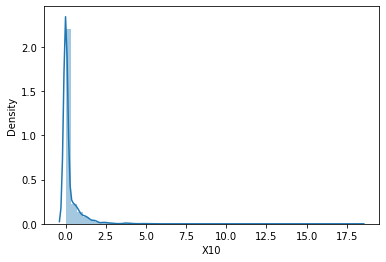

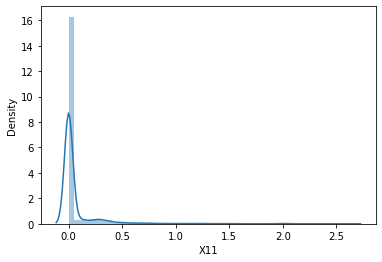

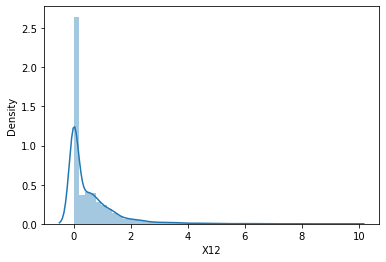

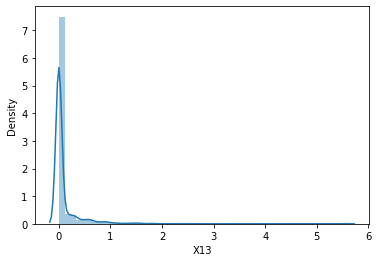

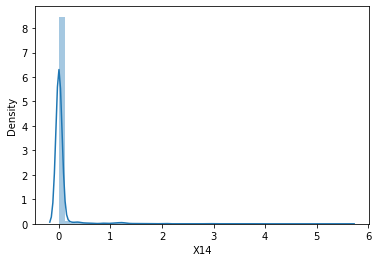

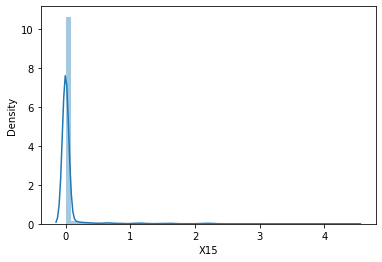

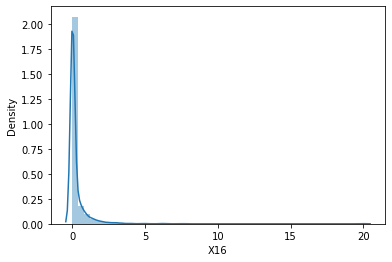

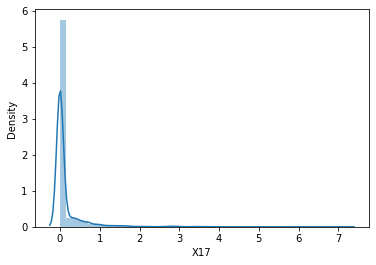

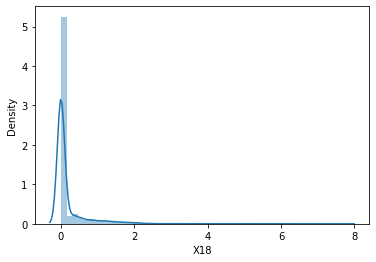

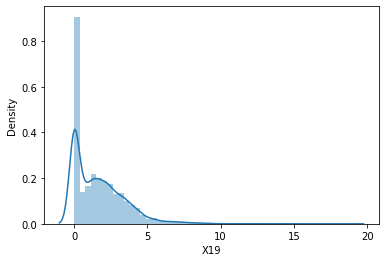

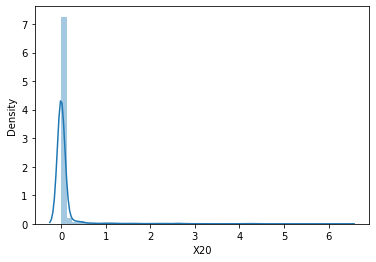

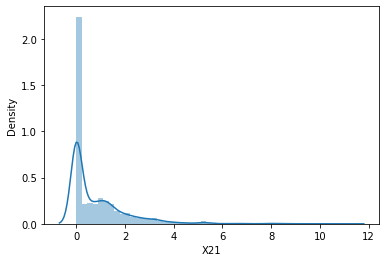

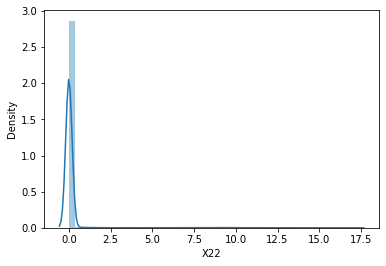

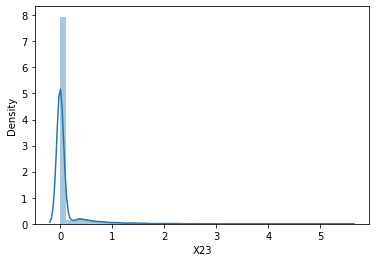

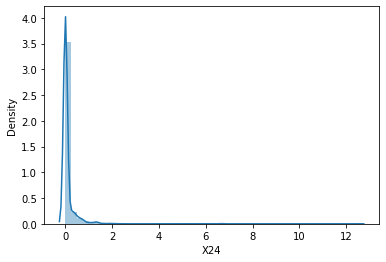

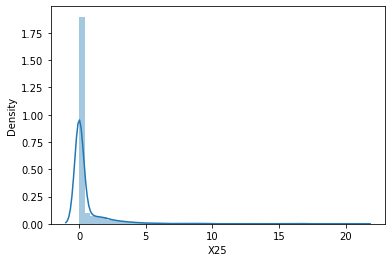

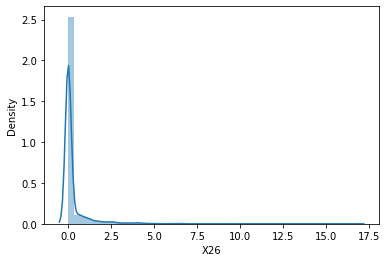

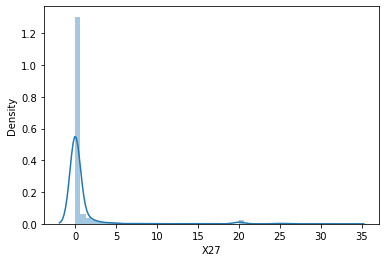

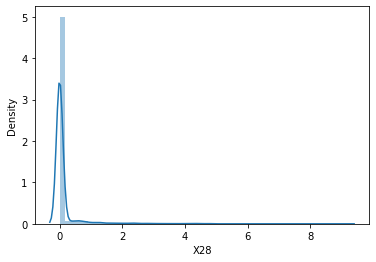

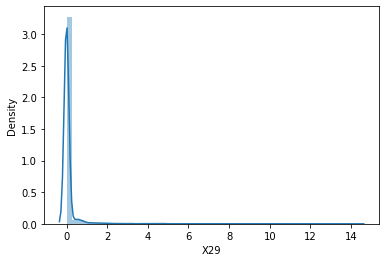

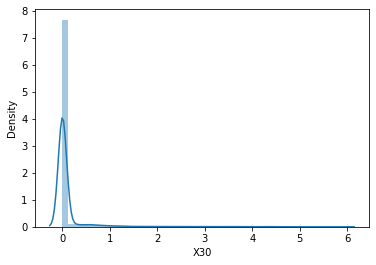

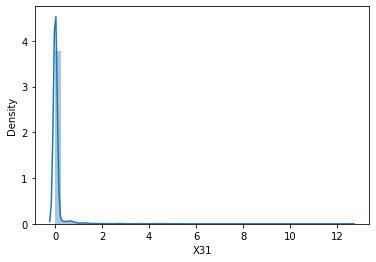

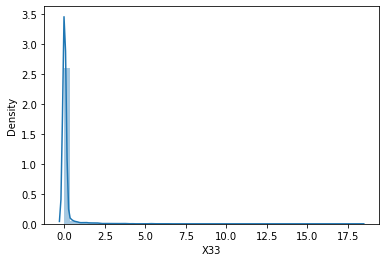

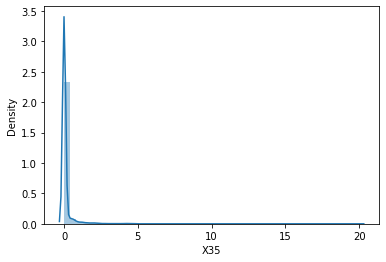

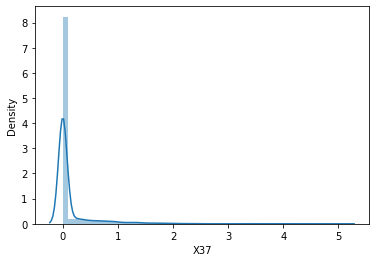

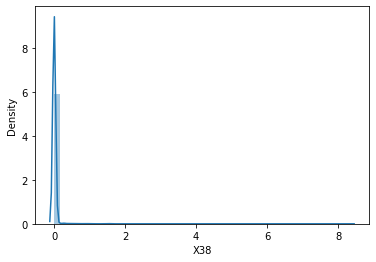

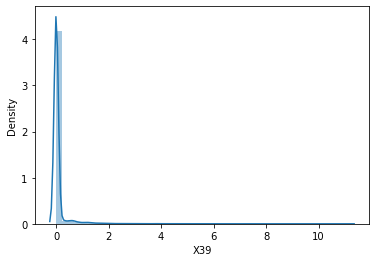

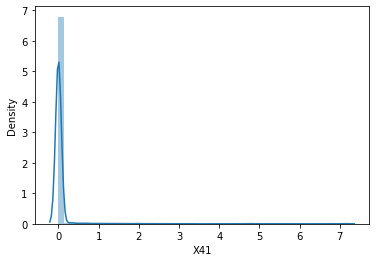

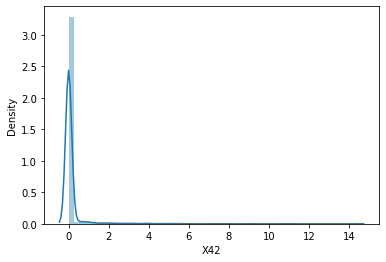

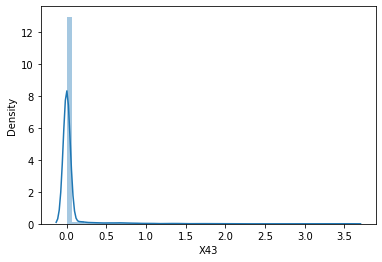

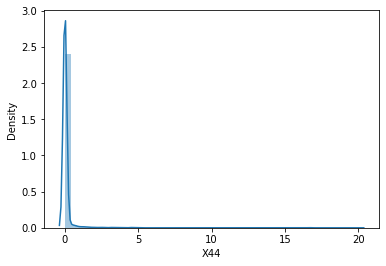

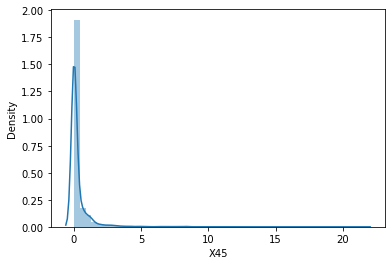

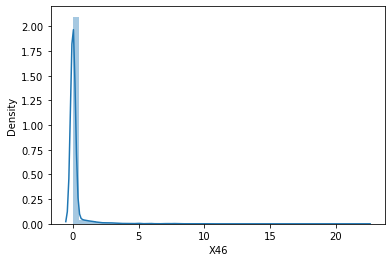

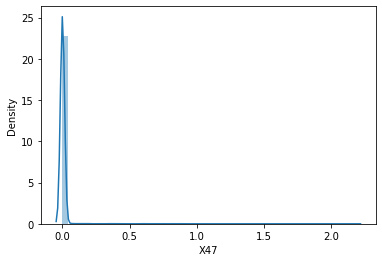

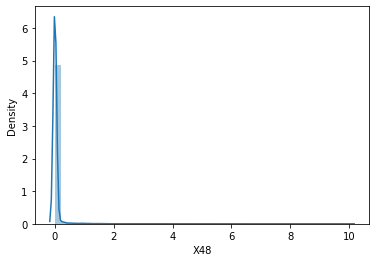

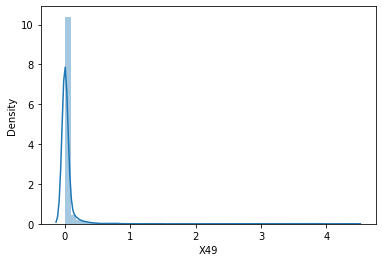

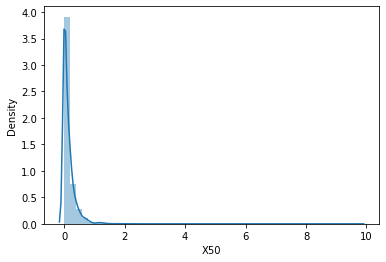

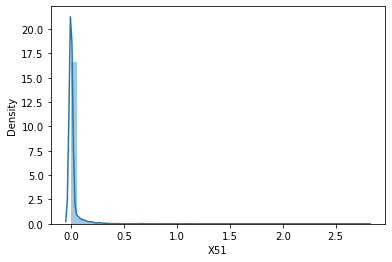

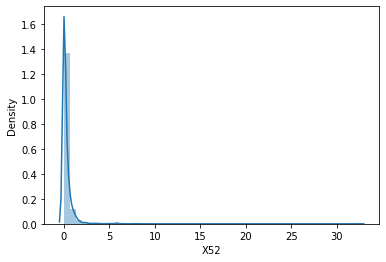

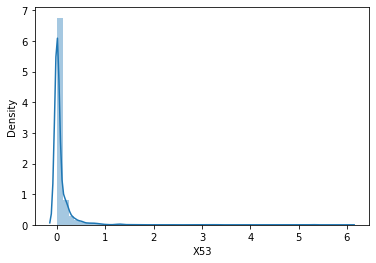

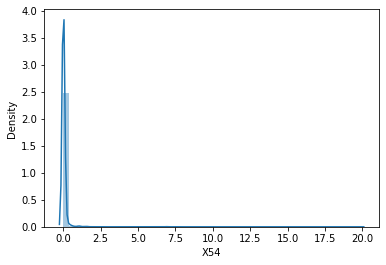

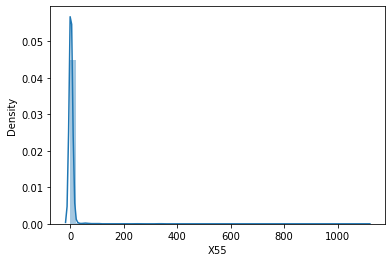

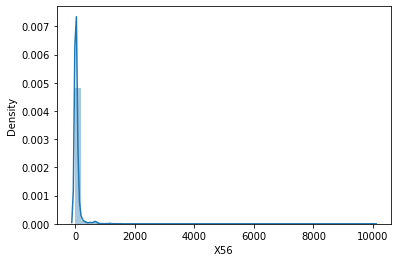

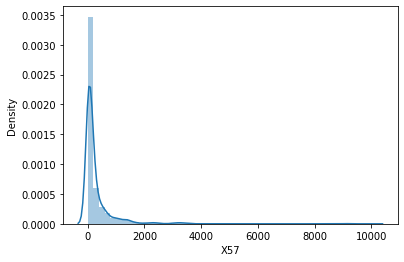

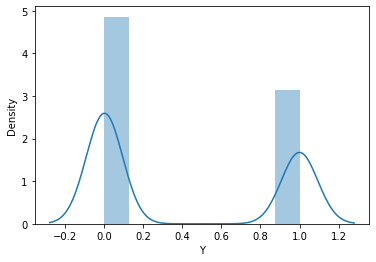

In [16]:
#checking distribution of the feature
for col in train.columns:
    sns.distplot(train[col])
    plt.show()

In [17]:
def box_plot(col):
    sns.boxplot(y = train[col])
    plt.show()

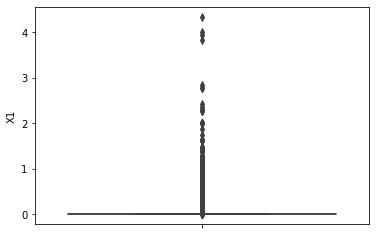

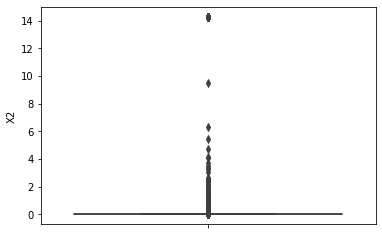

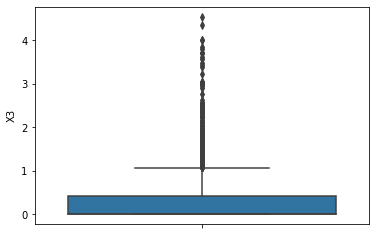

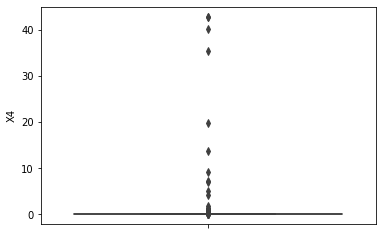

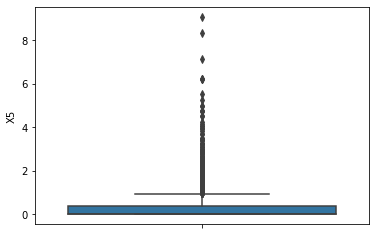

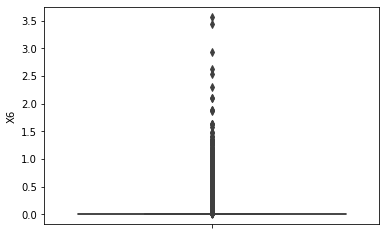

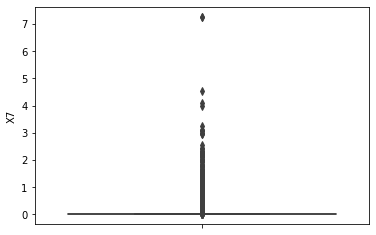

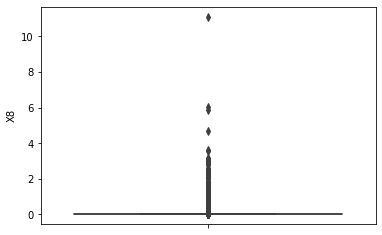

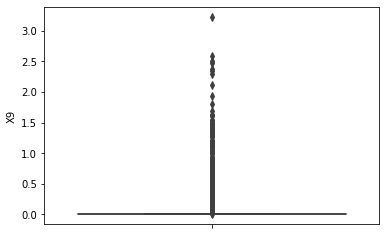

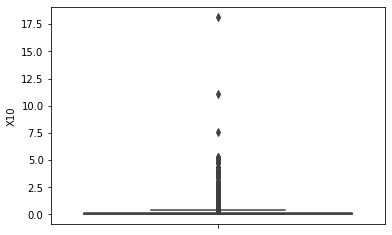

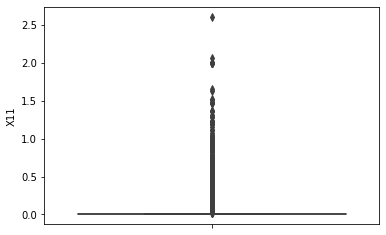

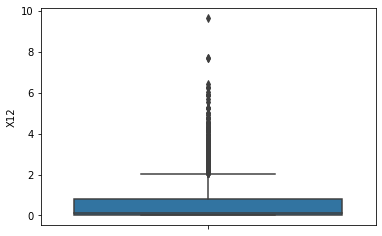

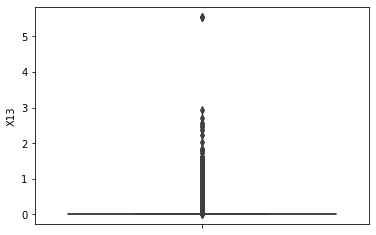

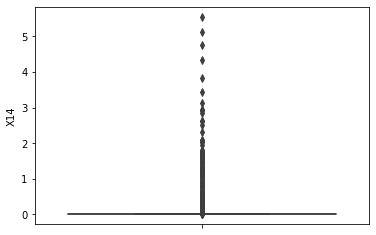

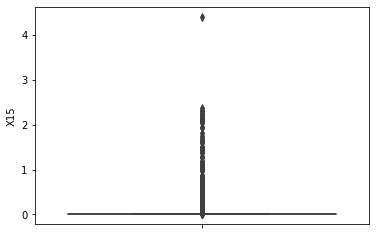

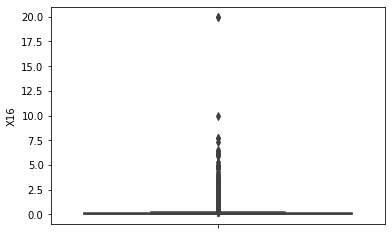

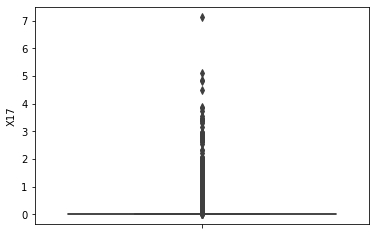

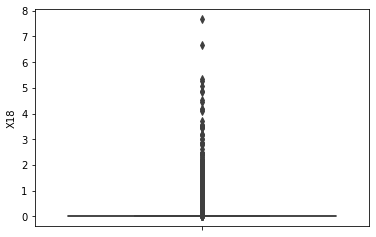

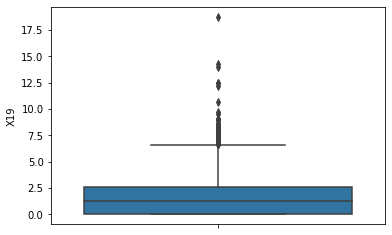

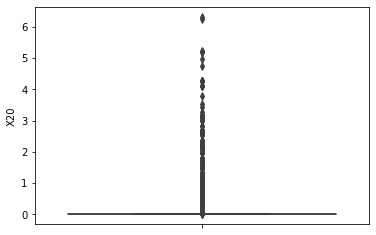

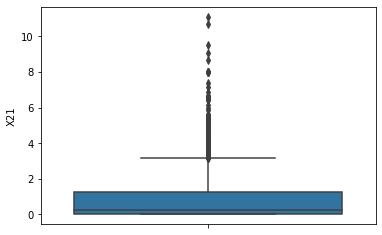

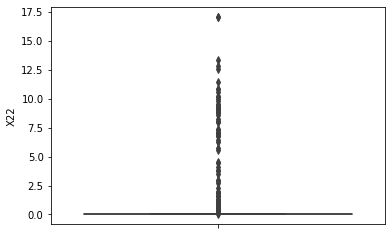

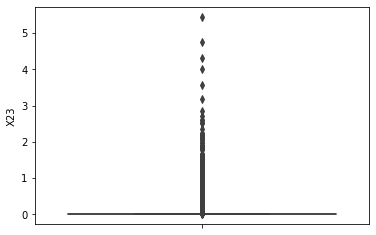

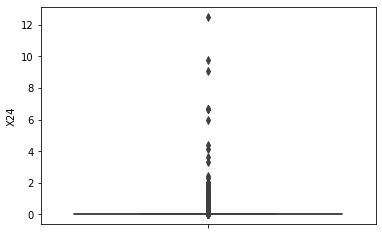

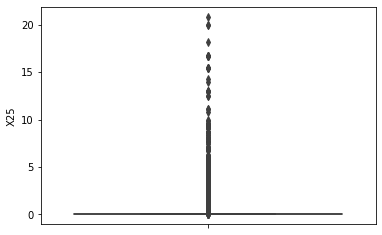

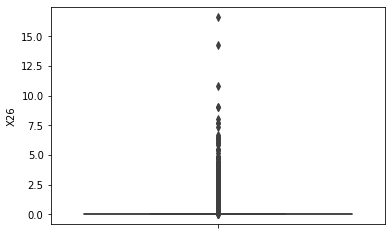

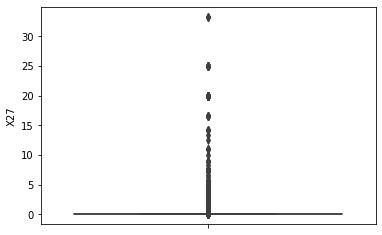

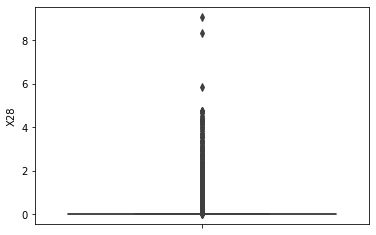

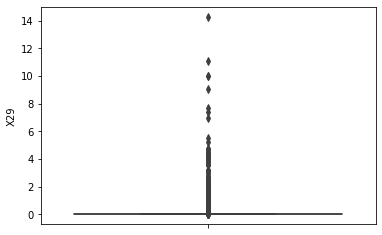

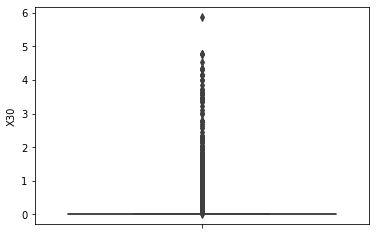

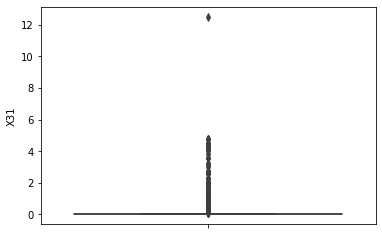

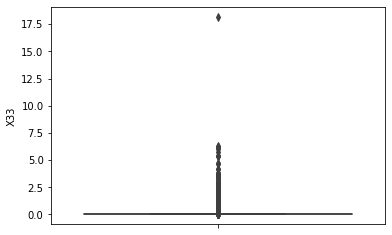

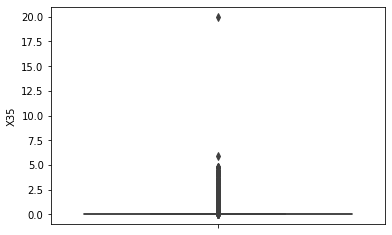

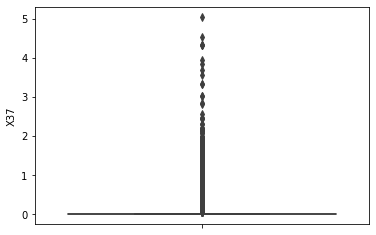

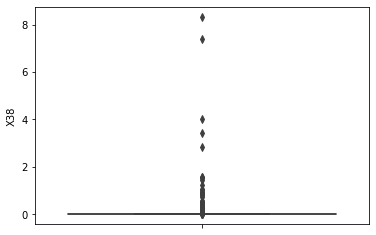

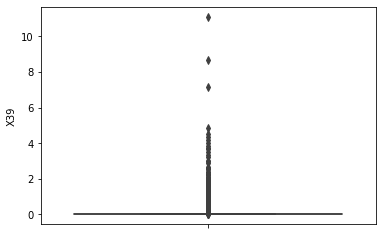

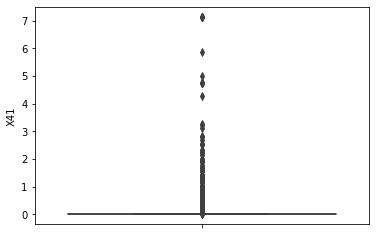

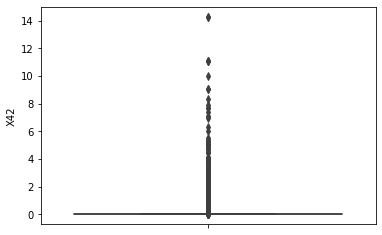

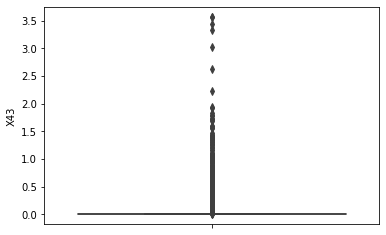

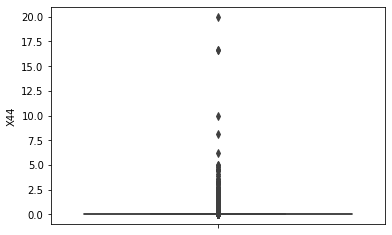

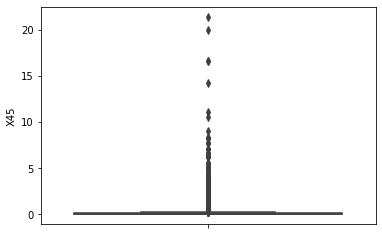

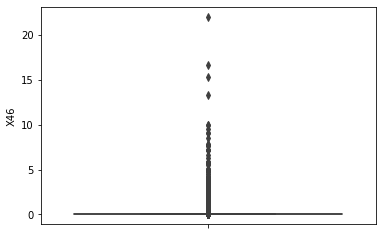

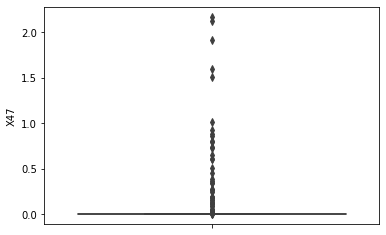

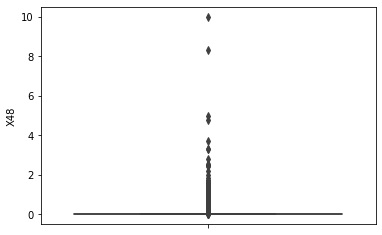

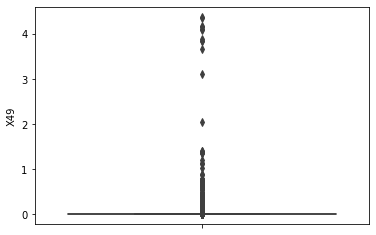

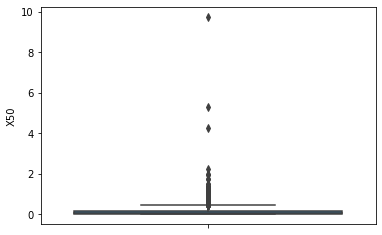

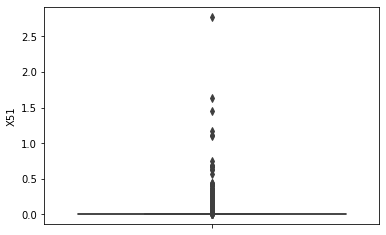

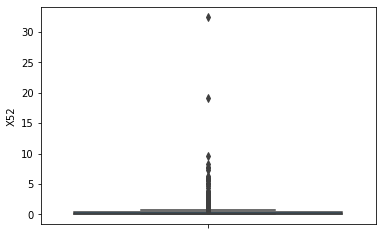

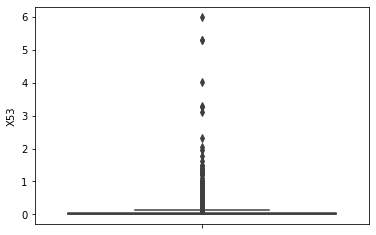

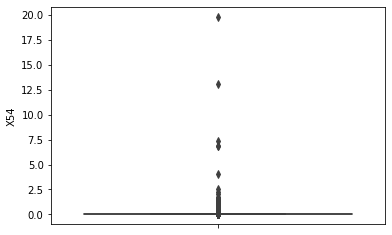

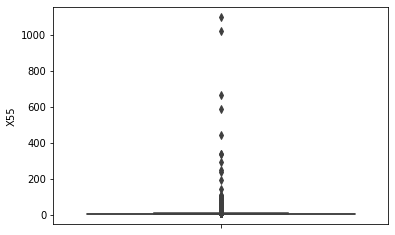

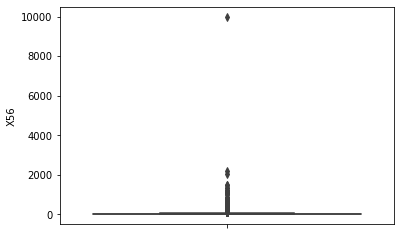

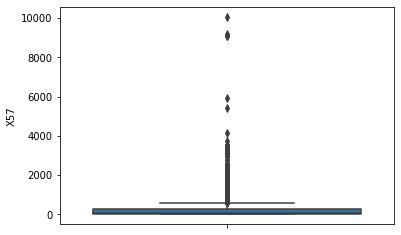

In [18]:
for col in train.columns:
    if col != 'Y':
        box_plot(col)

as seen from the about boxplots most of the varibale cointains outlier. Robust Scaler will help to remove the outlier and after applying robust scaler will apply min max scaler to normalise the data

In [19]:
train_features = train.loc[:, train.columns != 'Y']
train_target = train['Y']

In [20]:
#Applying robust scaling on feature
transformer = RobustScaler().fit(train_features)
train_transform = transformer.transform(train_features)

In [21]:
#Applying min max scaler
scaler = MinMaxScaler()
train_scaler = scaler.fit_transform(train_transform)

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train_scaler, train_target, test_size = 0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3128, 53)
(782, 53)
(3128,)
(782,)


This is a imbalanced class classification so have to apply SMOTE

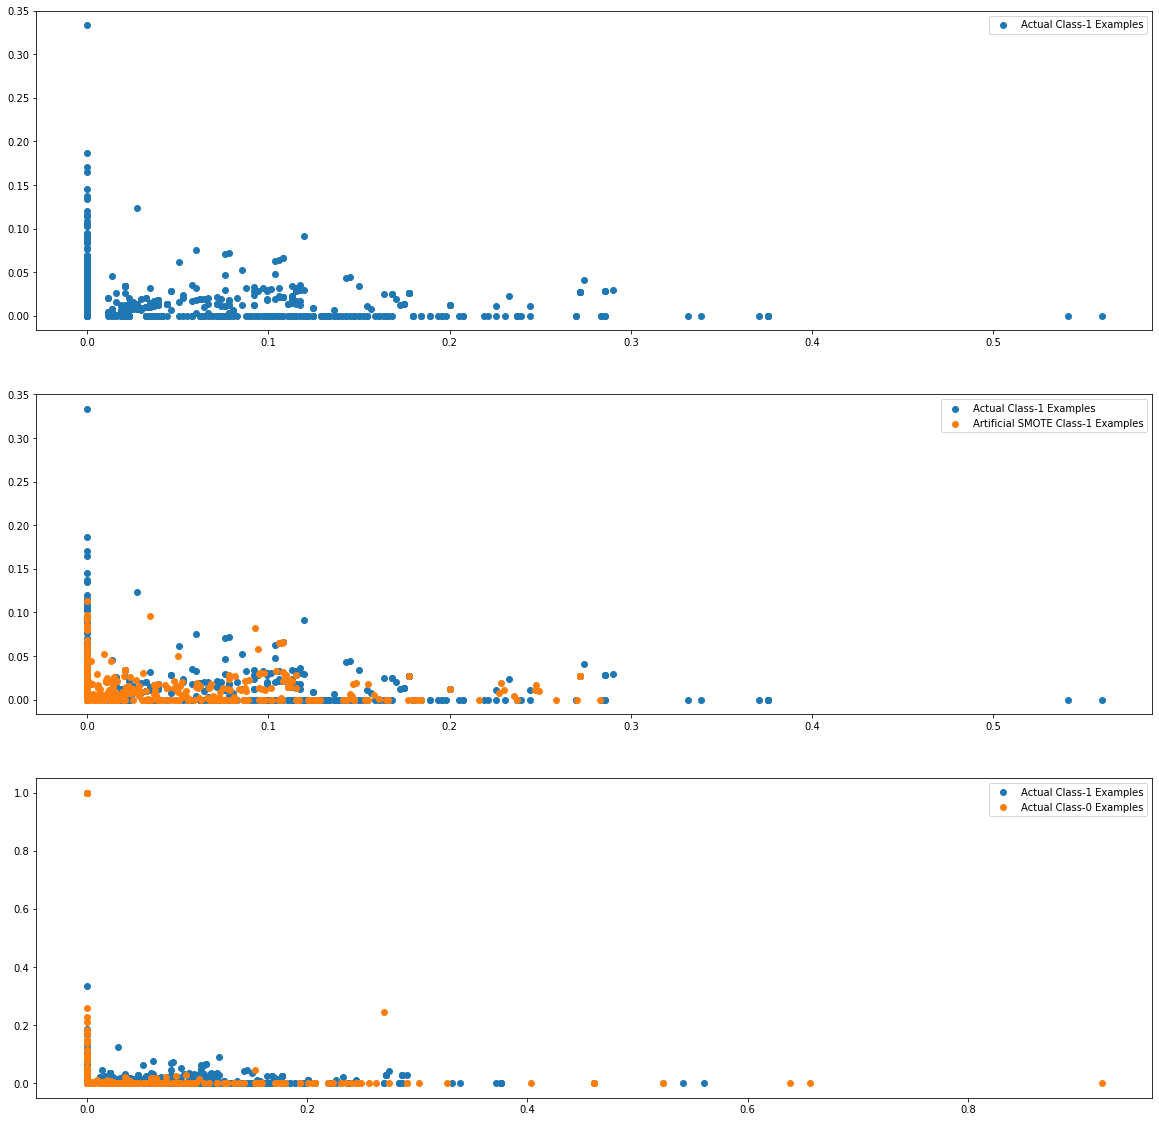

In [24]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [25]:
#implemting Random Forest and finding out the most important feature(top 10)

In [26]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline   

In [27]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

<AxesSubplot:>

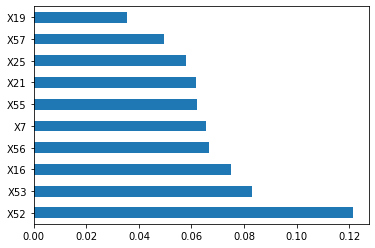

In [28]:
pd.Series(model.feature_importances_, index=train_features.columns).nlargest(10).plot(kind='barh')
# plt.show()

In [29]:
top_10_features_list = pd.Series(model.feature_importances_, index=train_features.columns).nlargest(10).index.to_list()

In [30]:
top_10_features_list

['X52', 'X53', 'X16', 'X56', 'X7', 'X55', 'X21', 'X25', 'X57', 'X19']

In [31]:
#selecting top 10 important feature
train_top_10 = train_features[top_10_features_list]
train_top_10.head()

,X52,X53,X16,X56,X7,X55,X21,X25,X57,X19
0,1.342,0.000,0.00,2,0.00,1.200,0.00,0.0,12,0.00
1,0.503,0.000,0.00,148,2.25,16.304,1.12,0.0,375,3.38
2,0.000,0.000,0.00,1,0.00,1.000,0.00,0.0,5,8.10
3,0.462,0.370,1.29,22,0.00,2.440,2.58,0.0,122,1.93
4,0.239,0.239,0.58,123,0.58,3.338,1.74,0.0,207,0.58


In [32]:
Robust_Scaler = RobustScaler().fit(train_top_10)
train_top_10_transform = Robust_Scaler.transform(train_top_10)

min_max_scaler = MinMaxScaler()
train_top_10_scaler = scaler.fit_transform(train_top_10_transform)

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(train_top_10_scaler, train_target, test_size = 0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(3128, 10)
(782, 10)
(3128,)
(782,)


In [35]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
model.score(X_valid, y_valid)

0.9322250639386189

[]

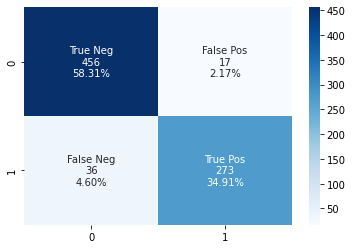

In [38]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_valid)#Get the confusion matrix
cf_matrix = confusion_matrix(y_valid, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.plot()

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])

0.9793886026669951

In [40]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_valid, model.predict(X_valid), target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.93      0.96      0.95       473
     class 1       0.94      0.88      0.91       309

    accuracy                           0.93       782
   macro avg       0.93      0.92      0.93       782
weighted avg       0.93      0.93      0.93       782



## Hyperparameter tuning using Gried Search

In [41]:
grid_params = {
    "n_estimators": [90, 100, 115, 130],
    "criterion": ['gini', 'entropy'],
    "max_depth": [2, 5, 10],
    "min_samples_leaf": [2, 5, 10],
    "min_samples_split": [2, 5, 10],
    'max_features': ['auto', 'log2']
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_search = GridSearchCV(estimator = model, param_grid = grid_params, cv= 5, n_jobs = -1, verbose = 3)

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [45]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=130)

In [46]:
model2 = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [47]:
model.score(X_valid, y_valid)

0.9322250639386189

[]

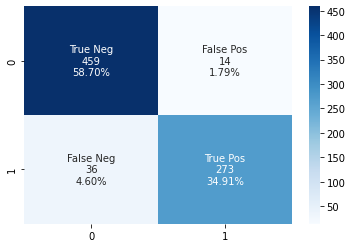

In [48]:
from sklearn.metrics import confusion_matrix

y_pred = model2.predict(X_valid)#Get the confusion matrix
cf_matrix = confusion_matrix(y_valid, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                    cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.plot()